<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [36]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup

import requests

import seaborn as sns

from sklearn.neighbors import NearestNeighbors

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
# Load in job_listings.csv
url = 'https://github.com/jae-finger/DS-Unit-4-Sprint-1-NLP/blob/master/module2-vector-representations/data/job_listings.csv?raw=true'

# Create job_listings df with raw data
job_listings_raw = pd.read_csv(url, index_col=0)

# Show first five rows
job_listings_raw.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
# Define a function to remove html tags before spacy tokenization
import html as ihtml
def remove_tags(text):
    text = BeautifulSoup(ihtml.unescape(text)).text
    text = re.sub(r"http[s]?://\S+", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"b'", "", text)
    text = re.sub(r'b"', "", text)
    return text

In [4]:
# Create BS Descriptions (sloppily)
new_descrip = []
for each in job_listings_raw['description']:
    fixed = remove_tags(each)
    new_descrip.append(fixed)
job_listings_raw['bs_description'] = new_descrip
df = job_listings_raw.copy()
df.head()

,description,title,bs_description
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...


## 2) Use Spacy to tokenize the listings 

In [5]:
# Load spacy model
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [7]:
# Create spacy review tokens using the tokenizer pipe
STOP_WORDS = nlp.Defaults.stop_words.union(['job'])
tokens = []
for doc in tokenizer.pipe(df['bs_description'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)

df['spaCy_tokens'] = tokens

In [8]:
df.head()

,description,title,bs_description,spaCy_review_tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...,"[requirements:, conceptual, understanding, mac..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...","[description, , data, scientist, 1,, help, bu..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[data, scientist, working, consulting, busines..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$4,969, -, $6,756, monthcontractunder, genera..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...,"[location:, usa, \xe2\x80\x93, multiple, locat..."


In [26]:
# Second way of teokenizing from lecture
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [28]:
# Create the document which contains the listings
text = str(job_listings_raw['bs_description'])

# Create a lemma stripped tokenized list
tokenize(text)

['0',
 '',
 'job',
 'requirement',
 'conceptual',
 'understanding',
 '',
 '1',
 '',
 'job',
 'description',
 '',
 'Data',
 'Scientist',
 '1',
 'wi',
 '',
 '2',
 '',
 'Data',
 'scientist',
 'work',
 'con',
 '',
 '3',
 '',
 '$',
 '4,969',
 '$',
 '6,756',
 'monthcontractunder',
 'gener',
 '',
 '4',
 '',
 'location',
 'USA',
 '\\xe2\\x80\\x93',
 'multiple',
 'location',
 '',
 '',
 '421',
 '',
 'want',
 'fantastic',
 'f',
 '',
 '422',
 '',
 'InternshipAt',
 'Uber',
 'ignite',
 'opportunity',
 'se',
 '',
 '423',
 '',
 '$',
 '200,000',
 '$',
 '350,000',
 'yearA',
 'million',
 'people',
 'y',
 '',
 '424',
 '',
 'SENIOR',
 'DATA',
 'scientist',
 'JOB',
 'description',
 '',
 'u',
 '',
 '425',
 '',
 'Cerner',
 'Intelligence',
 'new',
 'innovative',
 'organ',
 '',
 'bs_description',
 'Length',
 '426',
 'dtype',
 'object']

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [13]:
# Create the document which contains the listings
text = job_listings_raw['bs_description']

# Create the count vectorizer transformer
vect = CountVectorizer(stop_words='english')

# "fit" the vectorizer -- which builds a vocabulary
vect.fit(text)

# transform text based on fit/vocab
dtm = vect.transform(text)

In [14]:
# Get word counts for each job listing
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0305,0356,04,062,06366,10,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [22]:
sns.set()

def plot_sample_length_dist(sampletexts):
    """
    Plots the word length distribution.
    
    # Arguments: sampletexts- a list of job listing strings.
    """
    num_words = [len(s.split()) for s in sampletexts]
    
    plt.figure(figsize=(8,7))
    sns.distplot(num_words)
    plt.title('Number of Words per Listing', fontsize=15)
    plt.xlabel('Number of Words', fontsize=13)
    plt.ylabel('Proportion of Listings', fontsize=13)
    plt.show()

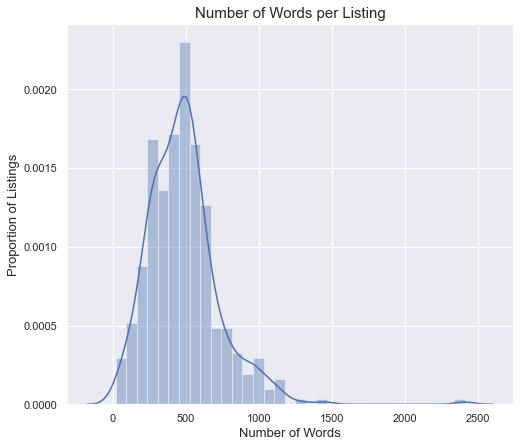

In [23]:
plot_sample_length_dist(text)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [35]:
# Recreate document list
text = []
for row in df['bs_description']:
    text.append(row)

# Instantiate TFIDFvectorizer
tfidf = TfidfVectorizer(stop_words = 'english',
                        ngram_range = (1,2),
                        min_df = 5, 
                        max_df = 0.6,
                        max_features = 5000
                       )

# Create vocabulary and tfidf score for each document
dtm = tfidf.fit_transform(text)

# Get feature to use as dataframe headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View the feature-matrix as df (shape and head)
print(dtm.shape)
dtm.head()

(426, 5000)


,000,000 employees,10,10 years,100,100 000,100 countries,11,12,12 months,...,years industry,years professional,years related,years relevant,years work,years working,years xe2,yes,york,york city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [37]:
# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [38]:
#Return details of listings most simiar to document #1
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.28949164, 1.30801341, 1.31837766, 1.31856137]]),
 array([[  0, 338, 115, 168, 393]]))

In [41]:
# Return description of most relevant job listing based on listing #1
text[338][:150]

'The FCA Manufacturing Planning and Control (MPC) organization is currently seeking a highly skilled, result-oriented Data Scientist to join our BDA (B'

In [50]:
# Create an ideal job description
ideal = ['My ideal job would be focused on biology, science, or technology. It would be located in california. Moving costs would be included. A signing bonus is encouraged.']

In [52]:
#Return details of listings most simiar to my ideal job
new_query = tfidf.transform(ideal)
nn.kneighbors(new_query.todense())

(array([[1.34939277, 1.36472384, 1.36812988, 1.3734728 , 1.37479114]]),
 array([[244, 154, 287, 313, 248]]))

In [53]:
# Return description of most relevant job listing based on my ideal job
text[224][:150]

'Grainger is a broad line, business-to-business distributor of maintenance, repair and operating (MRO) supplies and other related products and services'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 